In [10]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import os

import time

plt.style.use('fivethirtyeight')

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


consumer_key = os.getenv("bot_consumer_key")
consumer_secret = os.getenv("bot_consumer_secret")
access_token = os.getenv("bot_access_token")
access_token_secret = os.getenv("bot_access_token_secret")


In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
def parse_requests(tweet, tweet_dict=dict()):
    tweet_data = []
    tweet_id = tweet["id"]
    tweet_user = tweet["user"]["screen_name"]
    tweet_requests = []
    print(tweet_id)
    for mentions in tweet["entities"]["user_mentions"]:
        if mentions["screen_name"] != "PySentiBot":
            tweet_requests.append(mentions["screen_name"])
    
    tweet_dict = {"id":tweet_id,"user":tweet_user,"analysis_requests":tweet_requests}
    return tweet_dict

In [5]:
def analyze_sentiments(recent_tweets, sentiment_results=list()):
    sentiment_results = []
    for tweet in recent_tweets:
        new_tweet = cleanse_tweet(tweet)
        sentiment_result = analyzer.polarity_scores(new_tweet["text"])
        sentiment_results.append(sentiment_result)    
    return sentiment_results

In [6]:
def remove_noise(tweet, category, key, result_tweet=dict()):
    try:
        result_tweet = tweet
        tweet_text = tweet.get("text")
        tweet_items = tweet.get("entities").get(category)
        for item in tweet_items:
            replace_str = item[key]
            tweet_text = tweet_text.replace(replace_str," ")
        result_tweet["text"] = tweet_text
    except TypeError:
        pass
    return result_tweet

def cleanse_tweet(tweet,result_tweet=dict()):
    result_tweet = tweet
    result_tweet = remove_noise(result_tweet,"user_mentions","screen_name")
    result_tweet = remove_noise(result_tweet,"urls","url")
    result_tweet = remove_noise(result_tweet,"media","url")
    result_tweet["text"] = result_tweet["text"].replace("@","")
    return result_tweet

In [7]:
def color_map(value):
    if(value >= 0): 
        return 'g'
    else:
        return 'r'

def plot_sentiments(title,sentiments):
    df = pd.DataFrame(sentiments)
    df = df.reset_index()
#     df.plot(kind="scatter",x="index",y="compound",marker="o")
    df.plot( 'index', 'compound', linestyle='-', marker='o',alpha=0.75)
    plt.ylabel("Sentiment score")
    plt.xlabel("Tweets")
    plt.title(title)
    
    filename = "SentimentAnalysis_of_"+title+".png"
    plt.savefig(filename)
    
    return filename  

In [11]:
def scan_for_requests(since_tweet_id):
    search_handle = "@PySentiBot"

    results = api.search(search_handle,since_id = since_tweet_id)

    if(len(results["statuses"]) > 0):
        tweet_data = []

        for tweet in results["statuses"]:
            tweet_data.append(parse_requests(tweet))
        
        for item in tweet_data:

            recent_tweets = []

            for analyze_request in item["analysis_requests"]:

                recent_tweets = api.user_timeline(analyze_request,count=200)

                if(len(recent_tweets) > 0):
                    sentiments = analyze_sentiments(recent_tweets)
                    print(sentiments)
                    sentiment_fig = plot_sentiments(analyze_request,sentiments)
                    text_status = f"{datetime.now()} - Thank you for your tweet @{item['user']}! Here is the sentiment analysis of {analyze_request}!"
                    api.update_with_media(filename=sentiment_fig,status=text_status,in_reply_to_status_id=item["id"])
                else:
                    text_status = f"{datetime.now()} - Thank you for your tweet @{item['user']}! Sorry, {analyze_request} has no tweets!" 
                    api.update_status(text_status)

                plt.show()
        return results["statuses"][0]["id"]
    else:
        return since_tweet_id

935164194164441089
935137061757218816
935132891889233920
934868262533451779
933930946721648641
[{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019}, {'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.206, 'neu': 0.662, 'pos': 0.132, 'compound': -0.25}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.051, 'neu': 0.833, 'pos': 0.117, 'compound': 0.3773}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.069, 'neu': 0.826, 'pos': 0.106, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.0772}, {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.2584}, {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5346}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.4767}, {'neg': 0.109, 'neu': 0.669, 'pos': 0.222, 'compound': 0.4019}, {'neg': 0.229, 'neu': 0.593, 'pos': 0.178, 'compound': -0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

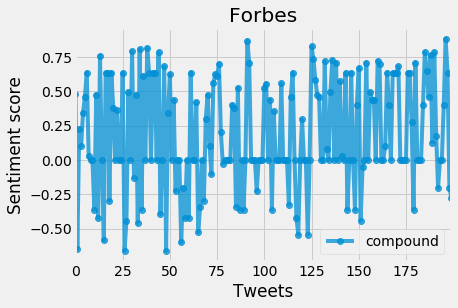

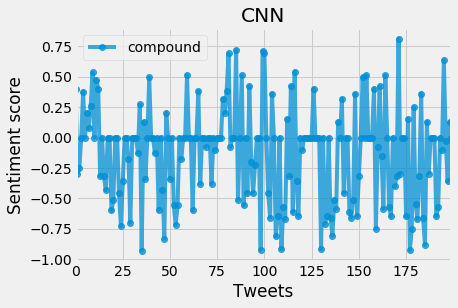

[{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}, {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}, {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.081, 'neu': 0.837, 'pos': 0.081, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5709}, {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}, {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.

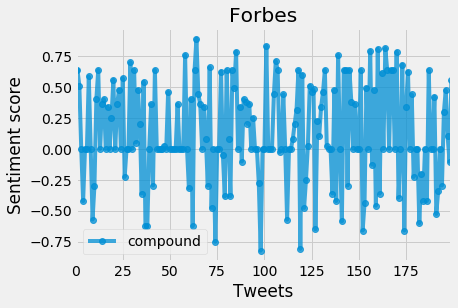

[{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.219, 'pos': 0.781, 'compound': 0.893}, {'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.3724}, {'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compound': 0.7712}, {'neg': 0.0, 'neu': 0.209, 'pos': 0.791, 'compound': 0.8221}, {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5707}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6114}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.1531}, {'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'compound': 0.7644}, {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369},

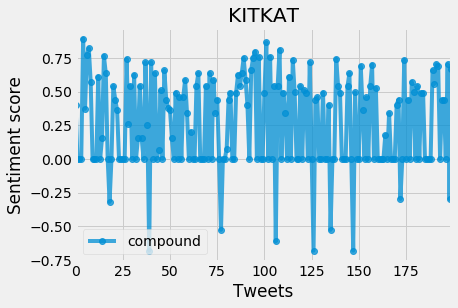

[{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}, {'neg': 0.074, 'neu': 0.8, 'pos': 0.126, 'compound': 0.2263}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.7177}, {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4199}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5983}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.2003}, {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8655}, {'neg': 0.133, 'neu': 0.553, 'pos': 0.314, 'compound': 0.5058}, {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4926}, {'neg': 0.2, 'neu': 0.438, 'pos': 0.362, 'compound': 0.2746}, {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp

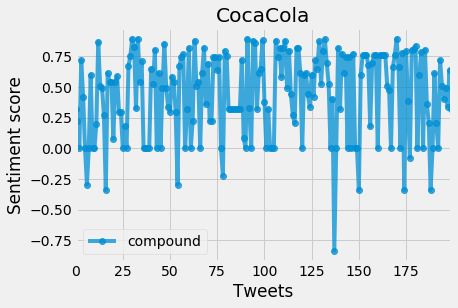

[{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.114, 'neu': 0.748, 'pos': 0.138, 'compound': 0.1511}, {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.5147}, {'neg': 0.145, 'neu': 0.777, 'pos': 0.078, 'compound': -0.3182}, {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.8271}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}, {'neg': 0.335, 'neu': 0.509, 'pos': 0.156, 'compound': -0.6858}, {'neg': 0.152, 'neu': 0.706, 'pos': 0.141, 'compound': -0.0772}, {'neg': 0.195, 'neu': 0.664, 'pos': 0.142, 'compound': -0.296}, {'neg': 0.178, 'neu': 0.723, 'pos': 0.099, 'compound': -0.4084}, {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8807}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.109, 'neu': 0.749, 'pos': 0.142, 'compound': 0.2062}, {'neg': 

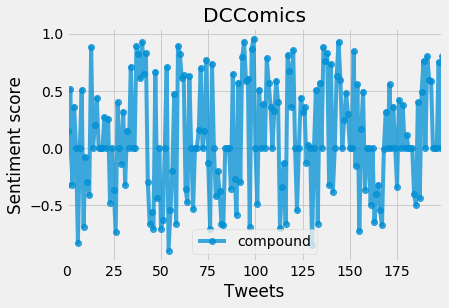

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.636}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.466, 'pos': 0.534, 'compound': 0.5562}, {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.25}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}, {'neg': 0.145, 'neu': 0.652, 'pos': 0.203, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'compound': 0.8687}, {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.5859}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3612}, {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.4753}, {

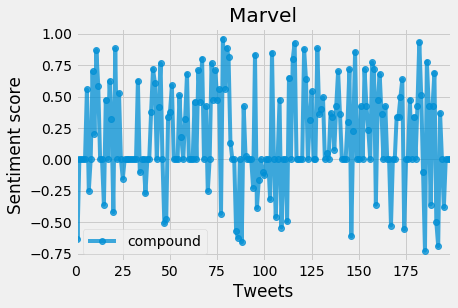

[{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.4019}, {'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.206, 'neu': 0.662, 'pos': 0.132, 'compound': -0.25}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.051, 'neu': 0.833, 'pos': 0.117, 'compound': 0.3773}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.069, 'neu': 0.826, 'pos': 0.106, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.0772}, {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.2584}, {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5346}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.4767}, {'neg': 0.109, 'neu': 0.669, 'pos': 0.222, 'compound': 0.4019}, {'neg': 0.229, 'neu': 0.593, 'pos': 0.178, 'compound': -0.3182}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.131, 'neu': 0.86

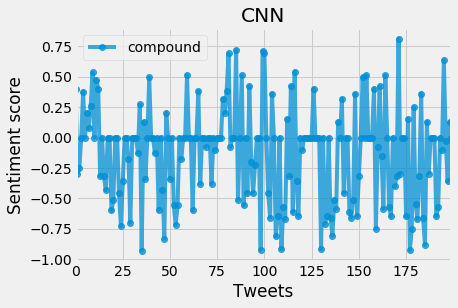

[{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}, {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}, {'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.5106}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.081, 'neu': 0.837, 'pos': 0.081, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.5709}, {'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}, {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.

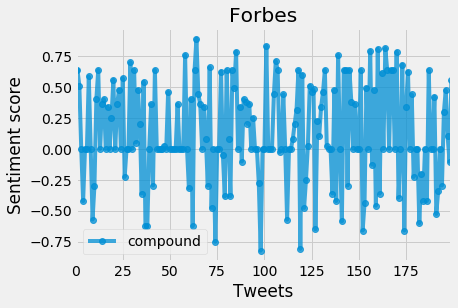

[{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.219, 'pos': 0.781, 'compound': 0.893}, {'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.3724}, {'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compound': 0.7712}, {'neg': 0.0, 'neu': 0.209, 'pos': 0.791, 'compound': 0.8221}, {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5707}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6114}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.1531}, {'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'compound': 0.7644}, {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369},

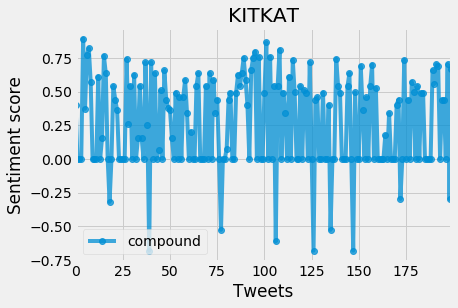

[{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}, {'neg': 0.074, 'neu': 0.8, 'pos': 0.126, 'compound': 0.2263}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.7177}, {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4199}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5983}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.2003}, {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8655}, {'neg': 0.133, 'neu': 0.553, 'pos': 0.314, 'compound': 0.5058}, {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4926}, {'neg': 0.2, 'neu': 0.438, 'pos': 0.362, 'compound': 0.2746}, {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp

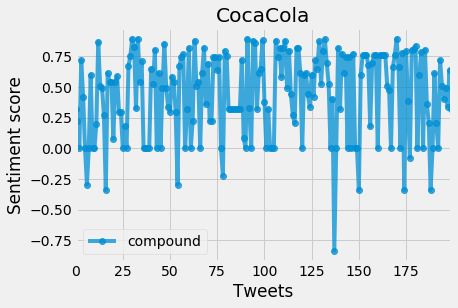

[{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.3182}, {'neg': 0.114, 'neu': 0.748, 'pos': 0.138, 'compound': 0.1511}, {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.5147}, {'neg': 0.145, 'neu': 0.777, 'pos': 0.078, 'compound': -0.3182}, {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.3612}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.8271}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}, {'neg': 0.335, 'neu': 0.509, 'pos': 0.156, 'compound': -0.6858}, {'neg': 0.152, 'neu': 0.706, 'pos': 0.141, 'compound': -0.0772}, {'neg': 0.195, 'neu': 0.664, 'pos': 0.142, 'compound': -0.296}, {'neg': 0.178, 'neu': 0.723, 'pos': 0.099, 'compound': -0.4084}, {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8807}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.109, 'neu': 0.749, 'pos': 0.142, 'compound': 0.2062}, {'neg': 

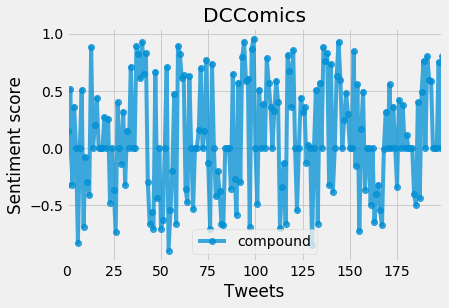

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.636}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.466, 'pos': 0.534, 'compound': 0.5562}, {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.25}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}, {'neg': 0.145, 'neu': 0.652, 'pos': 0.203, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'compound': 0.8687}, {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.5859}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3612}, {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.4753}, {

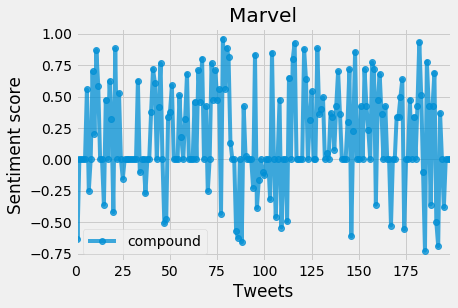

[{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.219, 'pos': 0.781, 'compound': 0.893}, {'neg': 0.0, 'neu': 0.439, 'pos': 0.561, 'compound': 0.3724}, {'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compound': 0.7712}, {'neg': 0.0, 'neu': 0.209, 'pos': 0.791, 'compound': 0.8221}, {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5707}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6114}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.1531}, {'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'compound': 0.7644}, {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369},

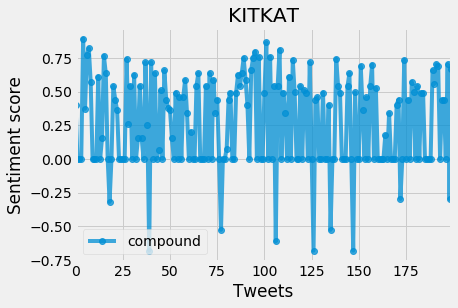

[{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}, {'neg': 0.074, 'neu': 0.8, 'pos': 0.126, 'compound': 0.2263}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.7177}, {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4199}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5983}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.2003}, {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8655}, {'neg': 0.133, 'neu': 0.553, 'pos': 0.314, 'compound': 0.5058}, {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4926}, {'neg': 0.2, 'neu': 0.438, 'pos': 0.362, 'compound': 0.2746}, {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp

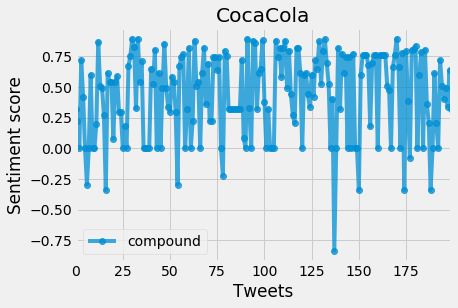

[{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.4019}, {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.3818}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.34}, {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6369}, {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.4019}, {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.5574}, {'neg': 0.207, 'neu': 0.69, 'pos': 0.103, 'compound': -0.34}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.2023}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.282, 'neu': 0.718, 'pos': 0.0, 'compound': -0.7096}, {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.6486}, {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2023}, {'neg': 0.0, 'neu': 0.926, 'pos': 0.074,

TweepError: [{'code': 226, 'message': "This request looks like it might be automated. To protect our users from spam and other malicious activity, we can't complete this action right now. Please try again later."}]

In [12]:
since_tweet_id = 933930057860599809
while True:
    since_tweet_id = scan_for_requests(since_tweet_id)
    time.sleep(300)